In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


data=[]
labels=[]
sets=36
cur_path=os.getcwd()
print("Completed")

Completed


In [3]:
for i in range(sets):
    path=os.path.join(cur_path,"Training",str(i))
    images=os.listdir(path)
    print(str(i),end=" ")
    for file_name in images:
        try:
            image= Image.open(path+ "/" +file_name)
            image=image.resize((30,30))
            image= np.array(image)
            data.append(image)
            labels.append(i)
        
        except Exception as e:
            print("Error loading image:"+file_name+"\n"+e)
            break
            
                              
data=np.array(data)
labels=np.array(labels)

print("\n",data.shape, labels.shape)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 
 (33906, 30, 30, 3) (33906,)


(27124, 30, 30, 3) (27124,) (6782, 30, 30, 3) (6782,)
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


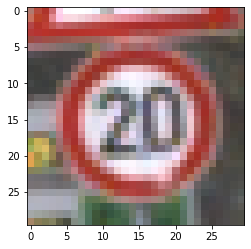

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=35)
y_test2=y_test
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(y_test[9])

y_train=to_categorical(y_train,36)
y_test=to_categorical(y_test,36)

print(y_test[9])
plt.imshow(x_test[9])

In [17]:
model=Sequential()
shape=x_train.shape[1:]
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Compiled")

Compiled


In [18]:
history=model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test))
model.save("tsr.h5")

Train on 27124 samples, validate on 6782 samples
Epoch 1/15
27124/27124 [==============================] - 131s 5ms/step - loss: 2.5396 - accuracy: 0.3356 - val_loss: 0.7809 - val_accuracy: 0.7946
Epoch 2/15
27124/27124 [==============================] - 133s 5ms/step - loss: 0.9028 - accuracy: 0.7323 - val_loss: 0.2855 - val_accuracy: 0.9297
Epoch 3/15
27124/27124 [==============================] - 136s 5ms/step - loss: 0.5219 - accuracy: 0.8471 - val_loss: 0.1640 - val_accuracy: 0.9602
Epoch 4/15
27124/27124 [==============================] - 136s 5ms/step - loss: 0.3833 - accuracy: 0.8899 - val_loss: 0.1883 - val_accuracy: 0.9474
Epoch 5/15
27124/27124 [==============================] - 139s 5ms/step - loss: 0.3322 - accuracy: 0.9043 - val_loss: 0.0964 - val_accuracy: 0.9757
Epoch 6/15
27124/27124 [==============================] - 138s 5ms/step - loss: 0.2926 - accuracy: 0.9170 - val_loss: 0.1452 - val_accuracy: 0.9583
Epoch 7/15
27124/27124 [==============================] - 137s 

In [10]:
loaded=load_model('tsr.h5')

right=0
tot=0
for i in range(sets):
    data=[]
    fold_right=0
    fold_total=0
    path=os.path.join(cur_path,"Training",str(i))
    images=os.listdir(path)
    for img in images:
        image= Image.open(path+ "/" +img)
        image=image.resize((30,30))
        image= np.array(image)
        data.append(image)
    data=np.array(data)
    pred=loaded.predict_classes(data)
    for j in pred:
        tot+=1
        fold_total+=1
        if(j==i):
            fold_right+=1
            right+=1
    print(i,"=>",fold_right/fold_total)
print(right/tot)

0 => 1.0
1 => 1.0
2 => 0.9970238095238095
3 => 0.9794776119402985
4 => 0.9813307802776448
5 => 0.9763289036544851
6 => 0.9645390070921985
7 => 0.9976275207591934
8 => 1.0
9 => 1.0
10 => 0.9924098671726755
11 => 0.986648865153538
12 => 0.9974811083123426
13 => 0.9782067247820673
14 => 0.9864661654135338
15 => 0.9973045822102425
16 => 0.9975
17 => 0.9781950333131435
18 => 1.0
19 => 0.9964726631393298
20 => 0.9981343283582089
21 => 0.9743589743589743
22 => 0.9910313901345291
23 => 0.9977777777777778
24 => 0.9956204379562044
25 => 1.0
26 => 0.9917920656634747
27 => 1.0
28 => 0.9943899018232819
29 => 0.9917898193760263
30 => 0.9755600814663951
31 => 0.9915966386554622
32 => 1.0
33 => 0.9895833333333334
34 => 0.9802331474911302
35 => 0.9312039312039312
0.9876717985017401


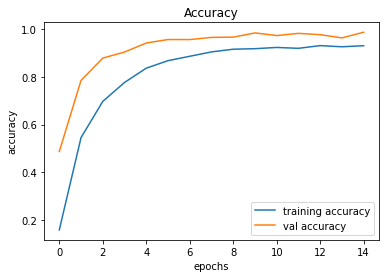

In [8]:
plt.figure()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()

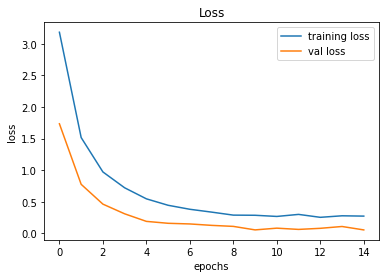

In [9]:
plt.figure()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()